# Part 07 : Machine Learning - Decision Tree

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Sample 1 : Predict Play Golf

In [2]:
weather = pd.read_excel('../Datasets/weather conditions.xlsx')

In [5]:
weather.columns

Index(['Unnamed: 0', 'Outlook', 'Temperature', 'Humidity', 'Windy',
       'Play Golf'],
      dtype='object')

In [6]:
weather.head()

,Unnamed: 0,Outlook,Temperature,Humidity,Windy,Play Golf
0,0,Rainy,Hot,High,False,No
1,1,Rainy,Hot,High,True,No
2,2,Sunny,Cool,Normal,True,No
3,3,Rainy,Mild,High,False,No
4,4,Sunny,Mild,High,True,No


In [7]:
weather.tail()

,Unnamed: 0,Outlook,Temperature,Humidity,Windy,Play Golf
9,9,Rainy,Cool,Normal,False,Yes
10,10,Rainy,Mild,Normal,True,Yes
11,11,Sunny,Mild,High,False,Yes
12,12,Sunny,Cool,Normal,False,Yes
13,13,Sunny,Mild,Normal,False,Yes


In [8]:
weather.shape

(14, 6)

In [10]:
x = weather[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = pd.Categorical(weather['Play Golf']).codes

In [11]:
x

,Outlook,Temperature,Humidity,Windy
0,Rainy,Hot,High,False
1,Rainy,Hot,High,True
2,Sunny,Cool,Normal,True
3,Rainy,Mild,High,False
4,Sunny,Mild,High,True
5,Overcast,Hot,High,False
6,Overcast,Cool,Normal,True
7,Overcast,Mild,High,True
8,Overcast,Hot,Normal,False
9,Rainy,Cool,Normal,False


In [12]:
x.shape

(14, 4)

In [13]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [14]:
y.shape

(14,)

In [17]:
x.loc[:, ['Outlook']] = x['Outlook'].astype('category').cat.codes
x.loc[:,['Temperature']] = x['Temperature'].astype('category').cat.codes
x.loc[:, ['Humidity']] = x['Humidity'].astype('category').cat.codes
x.loc[:, ['Windy']] = x['Windy'].astype('category').cat.codes

C:\Users\malihe_deep\AppData\Local\Temp\ipykernel_3648\806470881.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 0 1 0 1 1 0 0 1 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  x.loc[:, ['Windy']] = x['Windy'].astype('category').cat.codes


In [18]:
x

,Outlook,Temperature,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,2,0,1,1
3,1,2,0,0
4,2,2,0,1
5,0,1,0,0
6,0,0,1,1
7,0,2,0,1
8,0,1,1,0
9,1,0,1,0


## Entropy

In [19]:
def entropy2(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

print(y[(y > 0)].shape)
print(entropy2(9 / 14))
print(entropy2(5 / 14))
print(entropy2(7 / 14))     # When num of both lable is equal ==> entropy = 1

(9,)
0.9402859586706311
0.9402859586706311
1.0


In [23]:
weather[['Outlook', 'Temperature', 'Humidity' , 'Windy', 'Play Golf']].sort_values(by = 'Play Golf')

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Sunny,Cool,Normal,True,No
3,Rainy,Mild,High,False,No
4,Sunny,Mild,High,True,No
5,Overcast,Hot,High,False,Yes
6,Overcast,Cool,Normal,True,Yes
7,Overcast,Mild,High,True,Yes
8,Overcast,Hot,Normal,False,Yes
9,Rainy,Cool,Normal,False,Yes


## Modeling

In [26]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9)
mod_dt.fit(x, y)
prediction = mod_dt.predict(x)
print('Accuracy:', metrics.accuracy_score(prediction, y))

Accuracy: 1.0


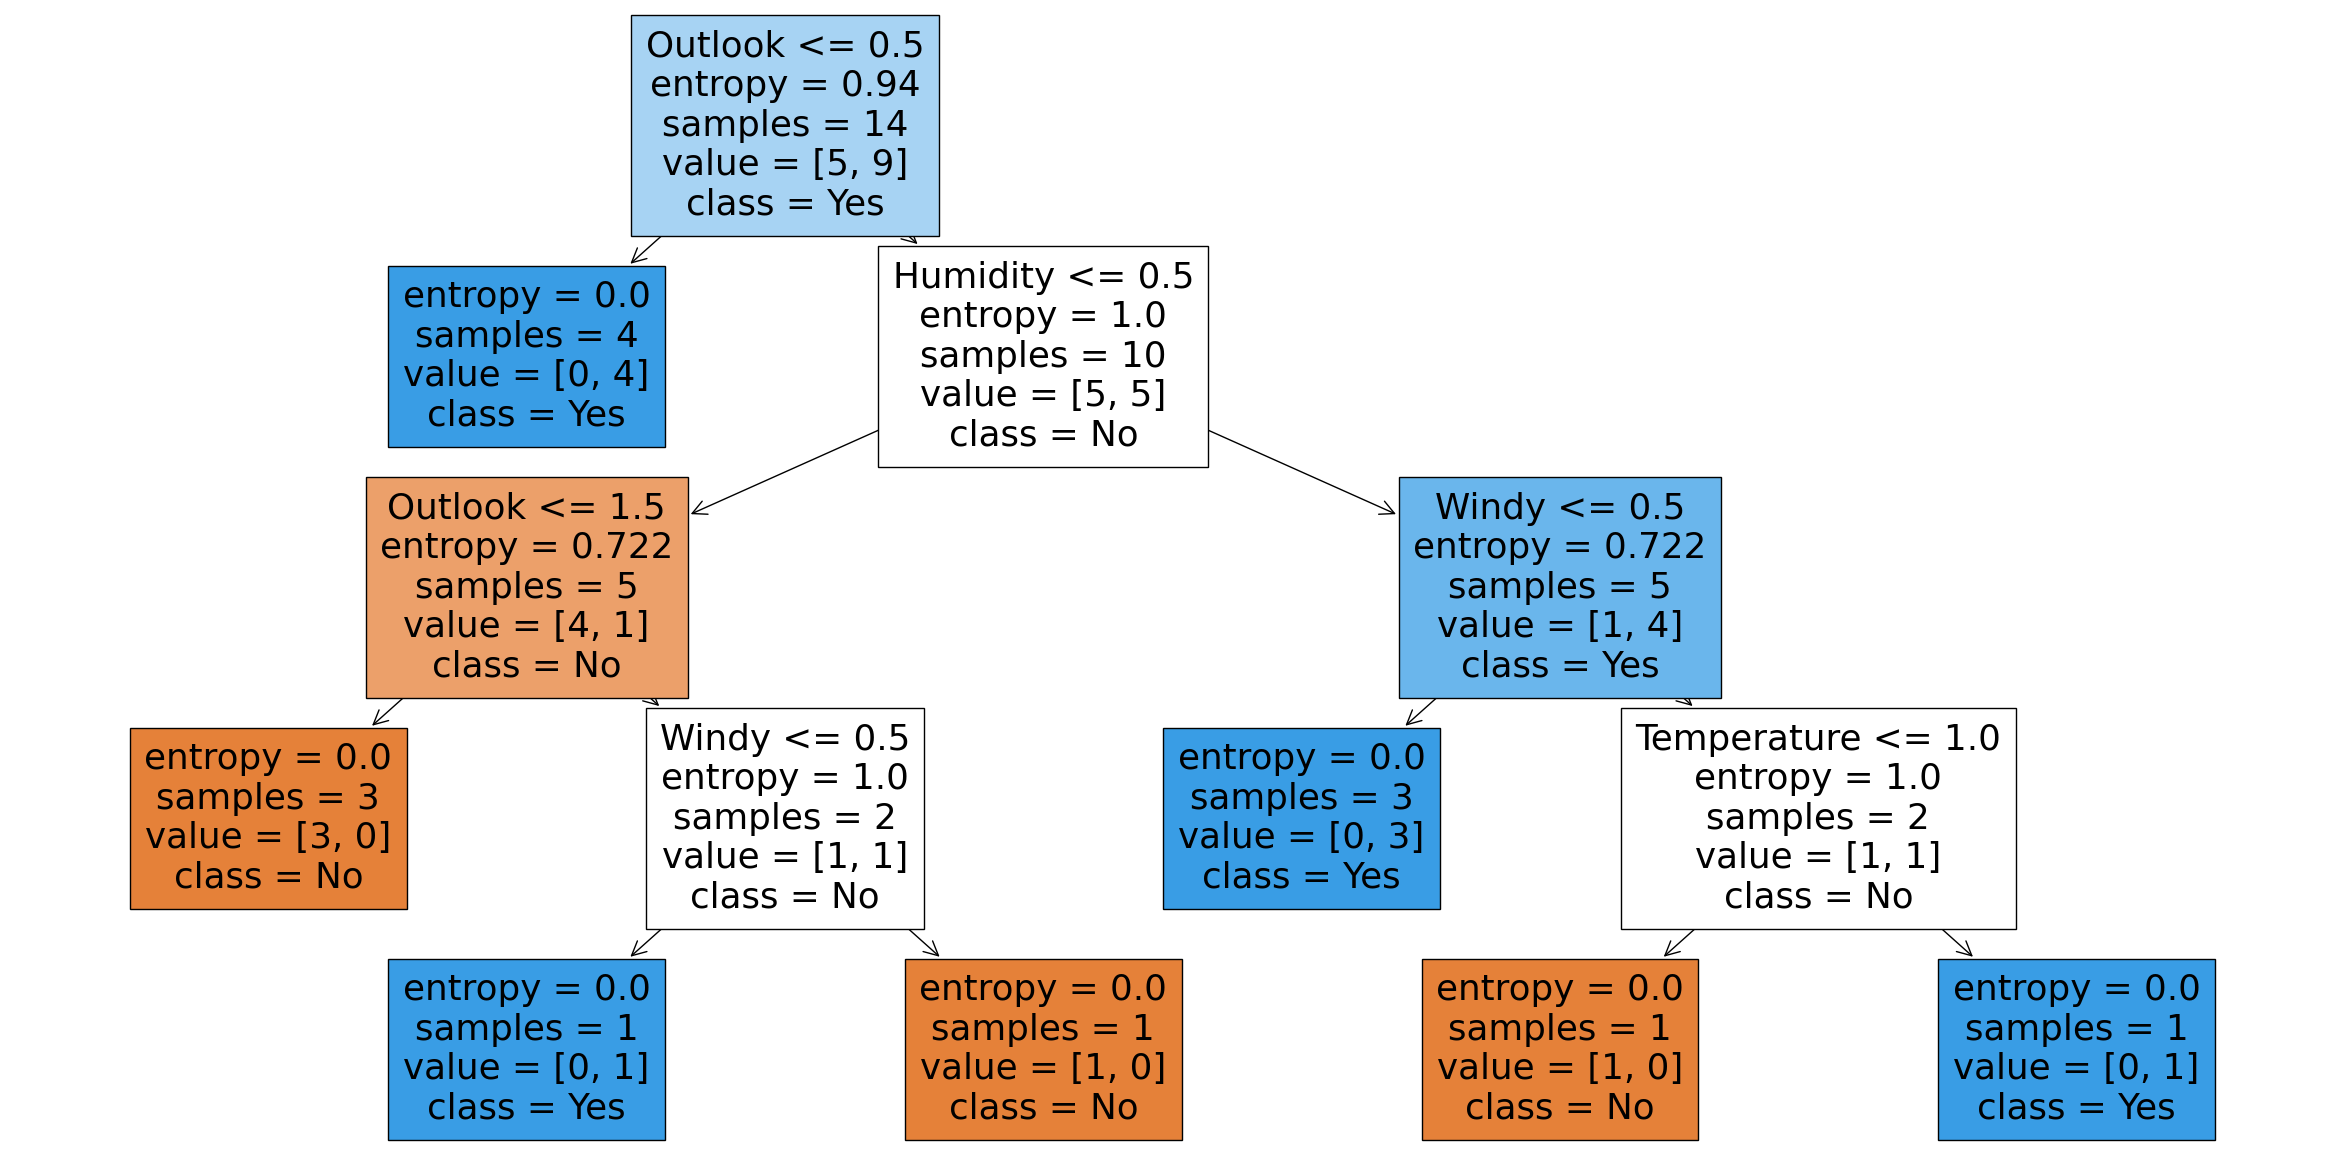

In [42]:
plt.figure(figsize = (30, 15))
plot_tree(mod_dt, feature_names = list(x.columns), class_names = ['No', 'Yes'], filled = True, max_depth = 30)   
plt.savefig('tree.png')

## Sample 2 : Predict Iris flowers

In [43]:
iris = pd.read_csv('../Datasets/iris.csv')

In [44]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
x = iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris.loc[:, ['class']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [53]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (120, 4)
x_test shape: (30, 4)
y_train shape: (120, 1)
y_test shape: (30, 1)


In [54]:
y_train

,class
21,Iris-setosa
47,Iris-setosa
141,Iris-virginica
90,Iris-versicolor
64,Iris-versicolor
...,...
41,Iris-setosa
93,Iris-versicolor
26,Iris-setosa
3,Iris-setosa


In [58]:
y_train['class'].unique()

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

### Modeling

In [62]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 1)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_pred, y_test) * 100))

Accuracy: 96.667


[Text(0.3, 0.9285714285714286, 'petal_width <= 0.75\nentropy = 1.585\nsamples = 120\nvalue = [40, 40, 40]\nclass = Iris-setosa'),
 Text(0.2, 0.7857142857142857, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.4, 0.7857142857142857, 'petal_length <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 40, 40]\nclass = Iris-virginica'),
 Text(0.3, 0.6428571428571429, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-virginica'),
 Text(0.5, 0.6428571428571429, 'petal_width <= 1.75\nentropy = 0.503\nsamples = 45\nvalue = [0, 5, 40]\nclass = Iris-versicolor'),
 Text(0.2, 0.5, 'petal_length <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]\nclass = Iris-virginica'),
 Text(0.1, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Iris-virginica'),
 Text(0.3, 0.35714285714285715, 'petal_width <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-versicolor'),
 Text(0.2, 0.21428571428571427, 'entropy = 0.0\nsa

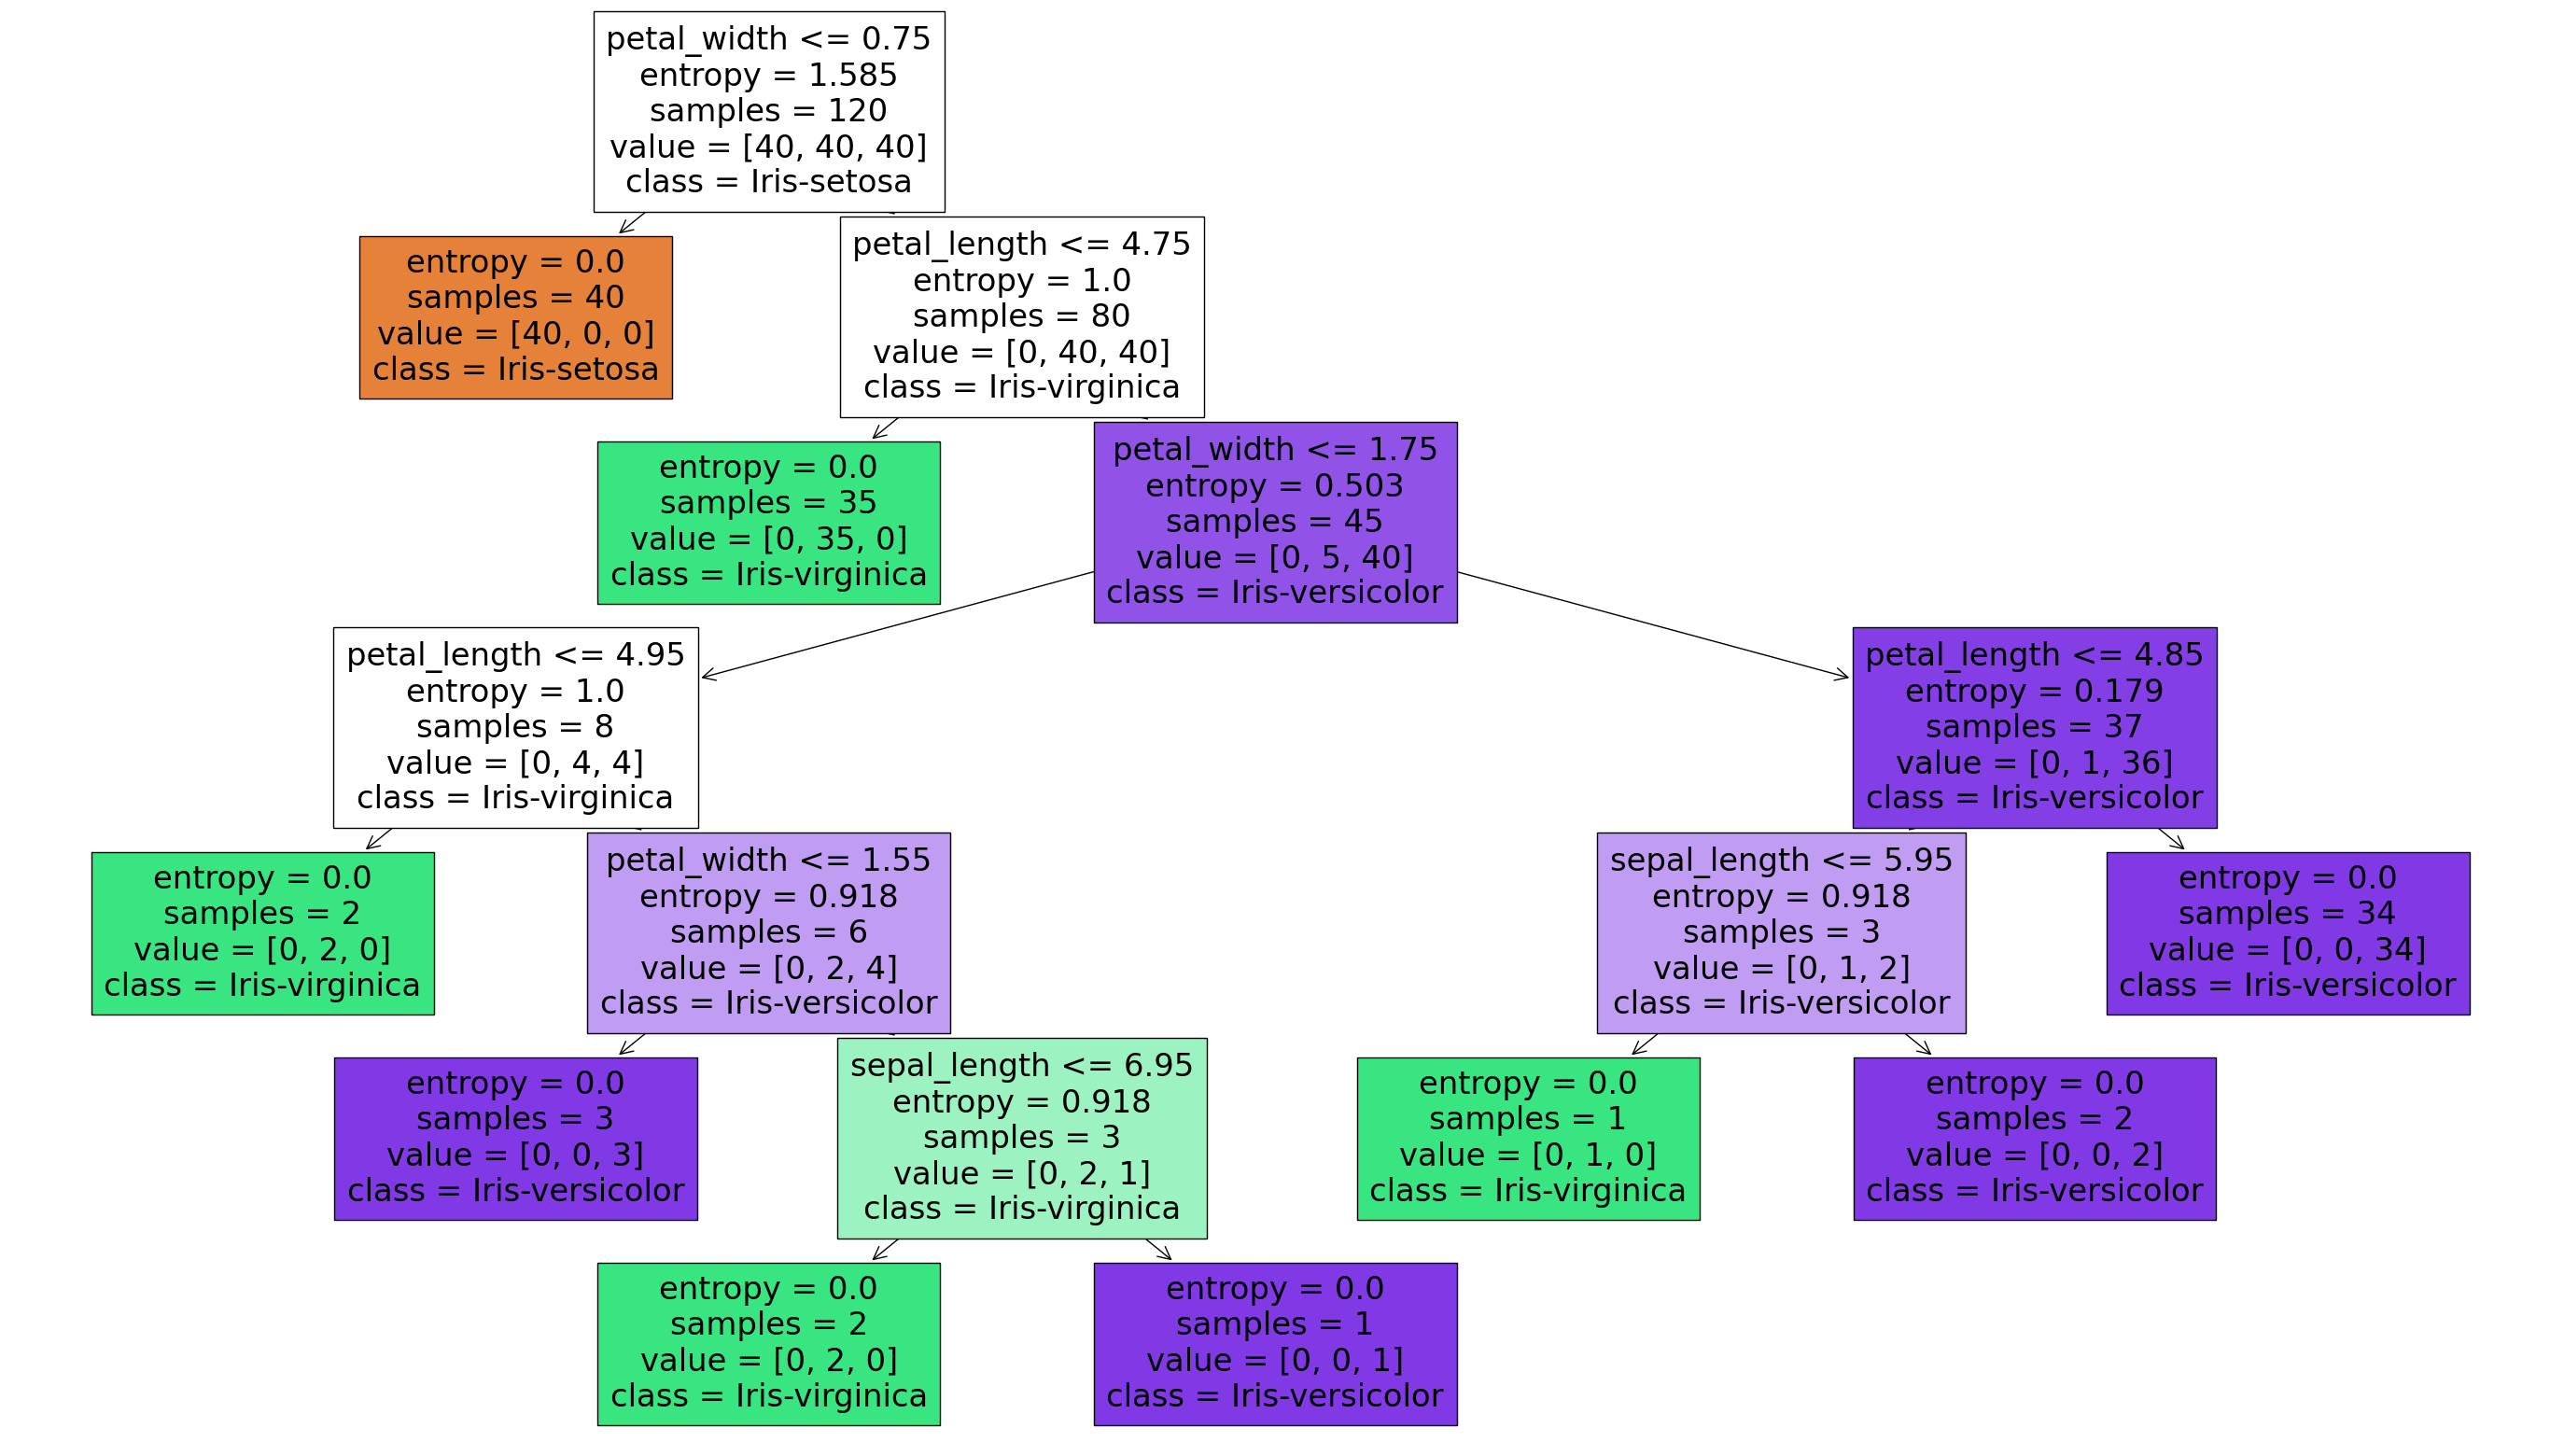

In [64]:
plt.figure(figsize = (35, 20))
plot_tree(dt,
          proportion = False,
          feature_names = list(x.columns),
          class_names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'],
          filled = True,
          max_depth = 10
          ) 

## Random Forest

In [65]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [66]:
x = iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['class'].astype('category').cat.codes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [67]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [69]:
y.unique()

array([0, 1, 2], dtype=int8)

In [70]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [71]:
iris['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object